In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### DATA
remember to change the filefolder

In [ ]:
###################
# BACKGROUND FILE #
###################
filefolder = 'processed/ER/'
filename = 'ER_all.hdf5'

In [4]:
###############
# SIGNAL FILE #
###############
filefolder = 'processed/mDM500GeV/'
filename = 'WP_mDM500GeV_sig1045.hdf5'

### WARNINGS:
1. Not all the events have the same array length (see below the time signatures 'peakS_xxxx')
2. Nothing is normalized
3. Images are flatten, you have to reshape them

### 6 Groups
##### Info stored in 6 groups: 
'HITS_bot', 'HITS_bot_img', 'HITS_top', 'HITS_top_img', 'peakS1_onlyhits', 'peakS1_raw', 'peakS2_onlyhits', 'peakS2_raw'

In [5]:
# OPEN THE SAVED FILE TO CHECK IT
g =h5py.File(filefolder+filename,'r')

# show the groups
g.keys()

<KeysViewHDF5 ['HITS_bot', 'HITS_bot_img', 'HITS_top', 'HITS_top_img', 'peakS1_onlyhits', 'peakS1_raw', 'peakS2_onlyhits', 'peakS2_raw']>

#### What is each group?

'HITS_xxxx' -> information about the photomultiplier tubes (PMTs) hitpatterns

    "HITS_bot" : S1 hitpatterns for the bottom PMTs           (121,) array with the response of each PMT (one value representing the intensity for each one of the 121 PMTs)
    "HITS_bot_img" : S1 hitpatterns for the bottom PMTs       (16384,) array with the same info as above, but as a 128*128 image (16384 = 128*128) to keep the PMT spatial correlation. It has to be reshaped to get a matrix.
    
    "HITS_top" : S1 hitpatterns for the bottom PMTs           (127,) array with the response of each PMT (one value representing the intensity for each one of the 121 PMTs)
    "HITS_top_img" : S1 hitpatterns for the bottom PMTs       (16384,) array with the same info as above, but as a 128*128 image (16384 = 128*128) to keep the PMT spatial correlation. It has to be reshaped to get a matrix.

'peakS_xxxx' -> information about the time morfology of the signals S1 and S2

    "peakS1_onlyhits' : response of sum(all PMTs) in time around the S1 signal       with a filter
    "peakS1_raw' : response of sum(all PMTs) in time around the S1 signal            without a filter
    
    "peakS2_onlyhits' : response of sum(all PMTs) in time around the S2 signal       with a filter
    "peakS2_raw' : response of sum(all PMTs) in time around the S2 signal            without a filter

###### WARNING!
unlike 'HITS_xxxx' that are arrays always with the same lenght (number of PMTs in Xenon1T), 

time signatures (i.e. 'peakS_xxxx' data) are NOT arrays of the same lengths for every event, since for different events the duration of the signal can vary (depending on where the interaction took place inside the experiment, I guess)

#### Events inside each group
each event is called:    ev_XX   where XX is the number of the event

In [6]:
# for example
g['HITS_bot'].keys()

<KeysViewHDF5 ['ev_1', 'ev_10', 'ev_100', 'ev_1000', 'ev_10000', 'ev_10001', 'ev_10002', 'ev_10003', 'ev_10004', 'ev_10005', 'ev_10006', 'ev_10007', 'ev_10008', 'ev_10009', 'ev_1001', 'ev_10010', 'ev_10011', 'ev_10012', 'ev_10013', 'ev_10014', 'ev_10015', 'ev_10016', 'ev_10017', 'ev_10018', 'ev_10019', 'ev_1002', 'ev_10020', 'ev_10021', 'ev_10022', 'ev_10023', 'ev_10024', 'ev_10025', 'ev_10026', 'ev_10027', 'ev_10028', 'ev_10029', 'ev_1003', 'ev_10030', 'ev_10031', 'ev_10032', 'ev_10033', 'ev_10034', 'ev_10035', 'ev_10036', 'ev_10037', 'ev_10038', 'ev_10039', 'ev_1004', 'ev_10040', 'ev_10041', 'ev_10042', 'ev_10043', 'ev_10044', 'ev_10045', 'ev_10046', 'ev_10047', 'ev_10048', 'ev_10049', 'ev_1005', 'ev_10050', 'ev_10051', 'ev_10052', 'ev_10053', 'ev_10054', 'ev_10055', 'ev_10056', 'ev_10057', 'ev_10058', 'ev_10059', 'ev_1006', 'ev_10060', 'ev_10061', 'ev_10062', 'ev_10063', 'ev_10064', 'ev_10065', 'ev_10066', 'ev_10067', 'ev_10068', 'ev_10069', 'ev_1007', 'ev_10070', 'ev_10071', 'ev_10

In [7]:
# number of events
len(g['HITS_bot'].keys())

32015

#### check that each group has the same lenght

In [8]:
# should be more than 10k

for groups1 in g.keys():
    
    print(len(g[groups1].keys()))
    

32015
32015
32015
32015
32015
32015
32015
32015


### Example of one event:

#### HITS (PMT patters) 
for one example

In [23]:
# this is the response of each PMT as an array, i.e the ones that turned on
print( g['HITS_bot/ev_542'] )
print( g['HITS_bot/ev_542'][()] )

<HDF5 dataset "ev_542": shape (121,), type "<f8">
[0.65586653 3.48653422 0.         0.         0.         0.81917388
 0.         0.         0.         0.         0.         0.74507803
 0.         0.         0.         1.05008989 0.         0.
 0.         1.0121679  0.         0.         0.         0.
 0.         0.         0.90743447 0.         0.         1.39868793
 0.         1.66033284 0.         2.69171897 0.         0.
 0.         0.88020678 0.         3.00901297 0.         0.
 0.         0.         0.         0.80455047 0.6633933  0.
 0.         0.94931099 0.         0.         2.23785044 0.
 0.         2.06571511 0.         0.         0.         1.39575167
 0.         1.07339784 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.67754416 0.         0.         0.
 2.09459606 0.         0.         2.28627487 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        

In [24]:
# Same event as before, but as a matrix 128*128=16384 components
g['HITS_bot_img/ev_542']

<HDF5 dataset "ev_542": shape (16384,), type "<f8">

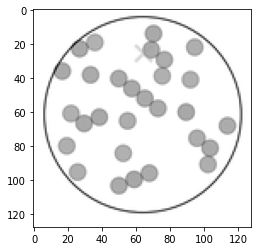

In [25]:
# but to represent it as an image we have to reshape it 
rebuild = np.reshape(g['HITS_bot_img/ev_542'][()], (128,128))
plt.imshow(rebuild, cmap='gray')
plt.show()

#### Peaks (time signature)
For the same event as before

In [26]:
# Notice that S1 and S2 signatures have different lenghts
print( g['peakS1_onlyhits/ev_542'] )
print( g['peakS2_onlyhits/ev_542'] )

<HDF5 dataset "ev_542": shape (62,), type "<f4">
<HDF5 dataset "ev_542": shape (818,), type "<f4">


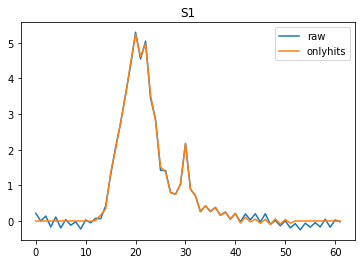

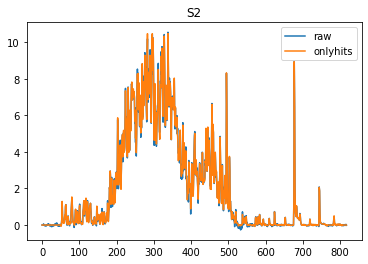

In [27]:
plt.plot(g['peakS1_raw/ev_542'][()], label='raw')
plt.plot(g['peakS1_onlyhits/ev_542'][()], label='onlyhits')
plt.legend()
plt.title('S1')
plt.show()


plt.plot(g['peakS2_raw/ev_542'][()], label='raw')
plt.plot(g['peakS2_onlyhits/ev_542'][()], label='onlyhits')
plt.legend()
plt.title('S2')
plt.show()